# Corpo - Mapa de calor

## Etapa 1 - Importando as bibliotecas

In [1]:
import cv2
import matplotlib.pyplot as plt
import zipfile

cv2.__version__

'4.7.0'

## Etapa 2 - Conectando com o Drive e acessando os arquivos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pose_path = '/content/drive/MyDrive/curso-cv/pose.zip'
zip_object = zipfile.ZipFile(file = pose_path, mode = 'r')
zip_object.extractall('./')

In [4]:
imagens_path = '/content/drive/MyDrive/curso-cv/imagens.zip'
zip_object = zipfile.ZipFile(file = imagens_path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

## Etapa 3 - Carregando os modelos e estruturas da rede neural pré-treinados

In [5]:
arquivo_proto = '/content/pose/body/mpi/pose_deploy_linevec_faster_4_stages.prototxt'
arquivo_pesos = '/content/pose/body/mpi/pose_iter_160000.caffemodel'

## Etapa 4 - Carregando uma imagem do Drive

In [6]:
imagem = cv2.imread('/content/imagens/body/multiple/multiple_1.jpeg')

In [7]:
imagem.shape
# altura em pixels, largura em pixels, 3 canais de cores (RGB)

(640, 640, 3)

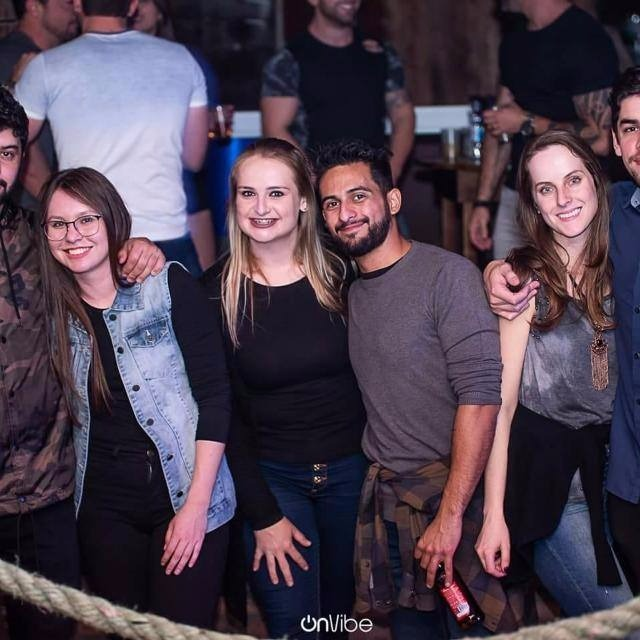

In [8]:
from google.colab.patches import cv2_imshow
cv2_imshow(imagem)

In [9]:
imagem_largura = imagem.shape[1]
imagem_altura = imagem.shape[0]

In [10]:
imagem_largura, imagem_altura

(640, 640)

## Etapa 5 - Leitura do modelo carregado na Etapa 3

In [11]:
# Vai ler o modelo que foi treinado com Caffe framework
modelo = cv2.dnn.readNetFromCaffe(arquivo_proto, arquivo_pesos)

## Etapa 6 - Definir as dimensões da imagem de entrada

In [12]:
# Vou definir novas dimensões para a imagem de entrada
# Quanto maior as dimensões de entrada mais lento é o processamento, entretanto tem uma precisão melhor
# Como estamos a nível de estudo, iremos diminuir as dimensões da imagem para ter um processamento mais rápido
altura_entrada = 368
# Usamos essa fórmula para deixar a largura da imagem proporcional com a altura da imagem
largura_entrada = int((altura_entrada / imagem_altura)* imagem_largura)

In [13]:
altura_entrada, largura_entrada

(368, 368)

## Etapa 7 - Converter a imagem do formato openCV para o formato blob Caffe

In [14]:
blob_entrada = cv2.dnn.blobFromImage(
    image=imagem,
    scalefactor=1.0/255,
    size=(largura_entrada, altura_entrada),
    mean = (0,0,0),
    swapRB=False,
    crop=False)

## Etapa 8 - Saída

In [15]:
modelo.setInput(blob_entrada)
saida = modelo.forward()

In [16]:
saida.shape

(1, 44, 46, 46)

In [17]:
saida[0].shape

(44, 46, 46)

In [18]:
saida[0][0]

array([[0.00049211, 0.00054041, 0.00080379, ..., 0.0004188 , 0.00048497,
        0.00056237],
       [0.00053339, 0.00058671, 0.00055662, ..., 0.00045707, 0.00048965,
        0.00057936],
       [0.00051214, 0.00057875, 0.00055863, ..., 0.00052235, 0.00050592,
        0.00054233],
       ...,
       [0.00052932, 0.00052271, 0.00055545, ..., 0.00058366, 0.00061255,
        0.00079496],
       [0.0005545 , 0.00055393, 0.00056722, ..., 0.00065917, 0.00077181,
        0.00096973],
       [0.00058384, 0.00059913, 0.00055851, ..., 0.00086402, 0.00097046,
        0.0009022 ]], dtype=float32)

In [31]:
ponto = 1
mapa_confianca = saida[0, ponto, :, :]
mapa_confianca = cv2.resize(mapa_confianca, (imagem_largura, imagem_altura))

(-0.5, 639.5, 639.5, -0.5)

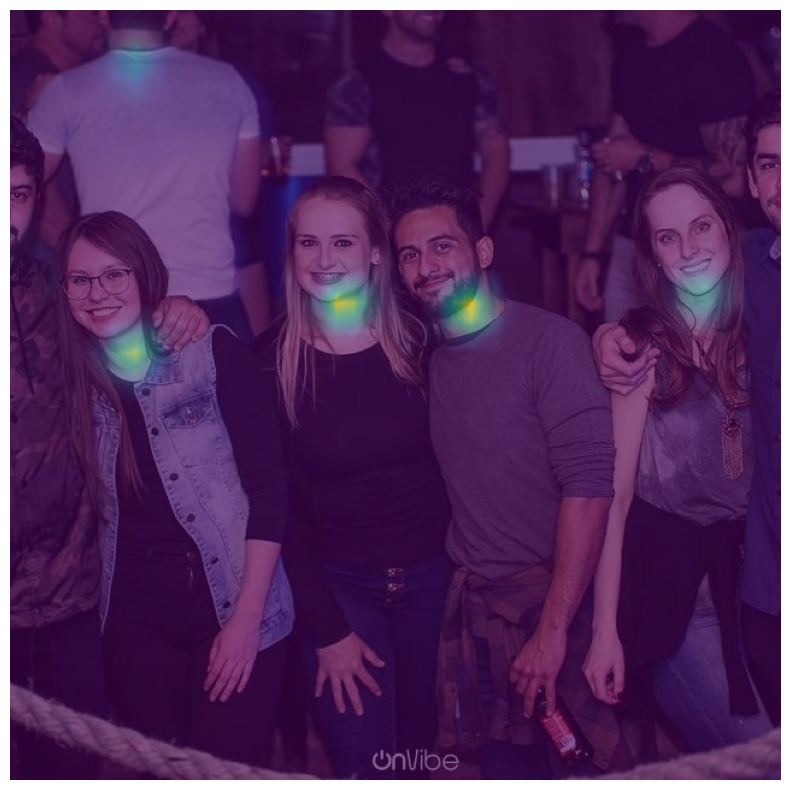

In [32]:
plt.figure(figsize = [14, 10])
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)) # No OpenCV os canais estão em BGR, netão preciso converter
plt.imshow(mapa_confianca, alpha =0.6)
plt.axis("off")

In [35]:
ponto = 16
mapa_afinidade = saida[0, ponto, :, :]
mapa_afinidade = cv2.resize(mapa_afinidade, (imagem_largura, imagem_altura))

(-0.5, 639.5, 639.5, -0.5)

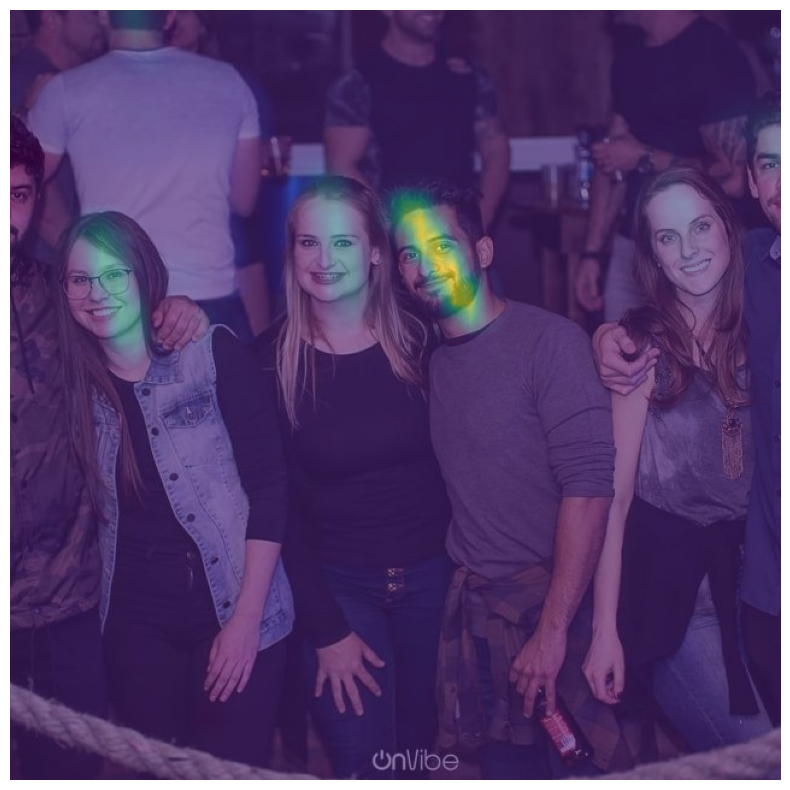

In [36]:
plt.figure(figsize = [14, 10])
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)) # No OpenCV os canais estão em BGR, netão preciso converter
plt.imshow(mapa_afinidade, alpha =0.6)
plt.axis("off")